<a href="https://colab.research.google.com/github/DmitriyGord/MachineLearningLabs/blob/main/Laba2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.pylabtools import figsize
figsize(10, 10)
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/playstore-analysis.csv', sep=',')
data.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [ ]:
data = data.drop(['App', 'Android Ver', 'Current Ver', 'Price', 'Genres'], axis='columns')

def replace_cr(cr):
  if cr == ('Everyone'):
    return 1
  return 0

data['Content Rating'] = data['Content Rating'].apply(replace_cr)

counts = data['Category'].value_counts()
nan_count = data['Category'].isnull().sum()

def replace_cat(cat):
  if pd.isnull(cat):
    return nan_count
  return counts[cat]

data['Category'] = data['Category'].apply(replace_cat) 

def delplus(inst):
  return inst[:-1]

data['Installs'] = data['Installs'].apply(delplus) 

def strtoint(string):
  if ',' in string:
    return int(string.replace(',',''))
  return string

data['Installs'] = data['Installs'].apply(strtoint)
data = data.drop([10472])
data['Installs'] = pd.to_numeric(data['Installs'])
def textsplit(text):
  return text.split(',')[-1]
  
data['Last Updated'] = data['Last Updated'].apply(textsplit)
data['Last Updated'] = data['Last Updated'].astype(int)

data['Reviews'] = pd.to_numeric(data['Reviews'])
def f4free(free):
  if free == ('Free'):
    return 1
  return 0
  
data['Type'] = data['Type'].apply(f4free)

def binary_nans(value):
  if pd.isnull(value):
    return 2.5
  return value

for col in ['Rating']:
  data[col] = data [col].apply(binary_nans)

data = data.drop([9148])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10839 non-null  int64  
 1   Rating          10839 non-null  float64
 2   Reviews         10839 non-null  int64  
 3   Size            10839 non-null  float64
 4   Installs        10839 non-null  float64
 5   Type            10839 non-null  int64  
 6   Content Rating  10839 non-null  int64  
 7   Last Updated    10839 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 762.1 KB


In [ ]:
X = data[data.columns.difference(['Type'])]
y = data['Type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


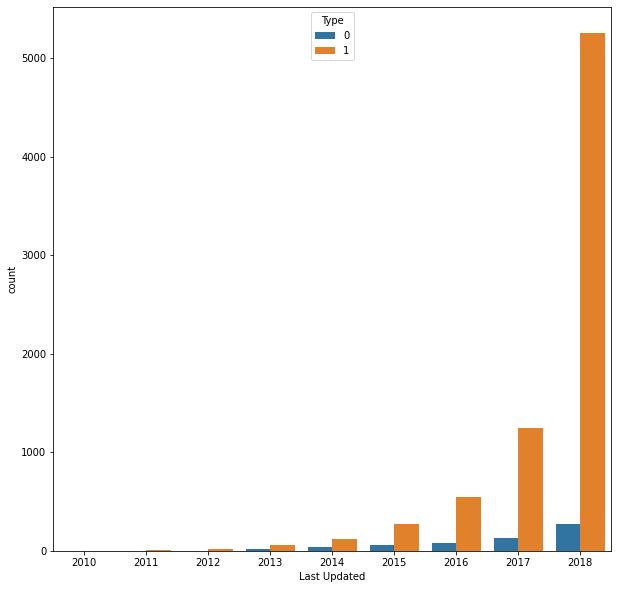

In [ ]:
sns.countplot(X_train['Last Updated'], hue=y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


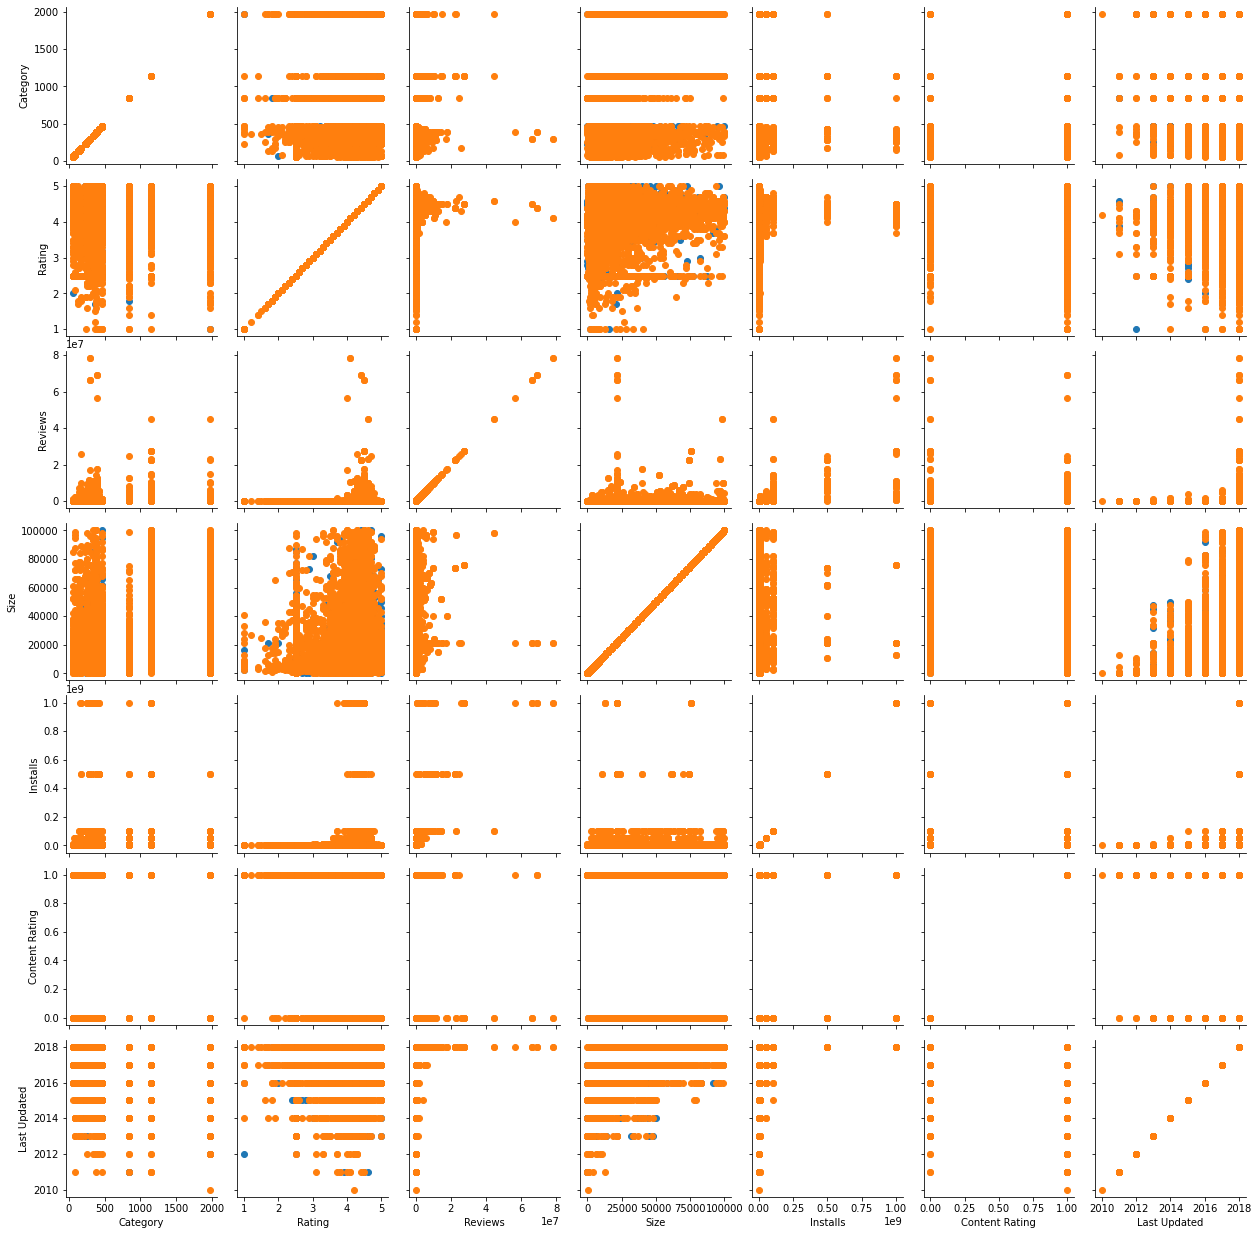

In [ ]:
df_for_pairgrid = X_train[['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Content Rating', 'Last Updated']]
df_for_pairgrid['Type'] = y_train

sns.PairGrid(df_for_pairgrid, hue='Type').map(plt.scatter)

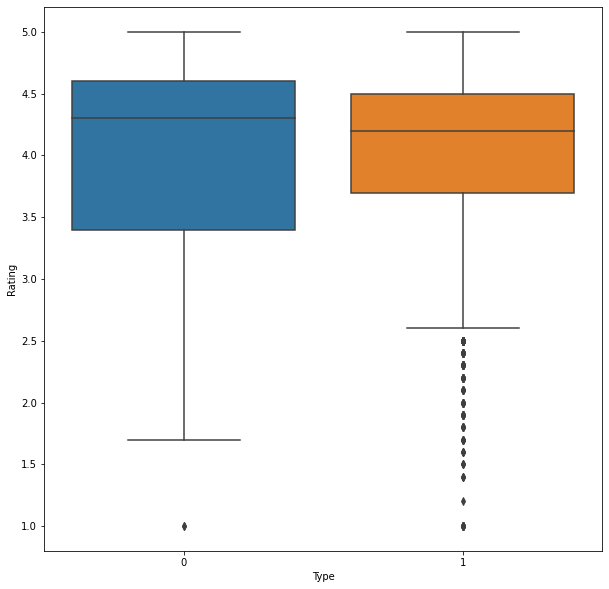

In [ ]:
sns.boxplot(x=y, y=data['Rating'])

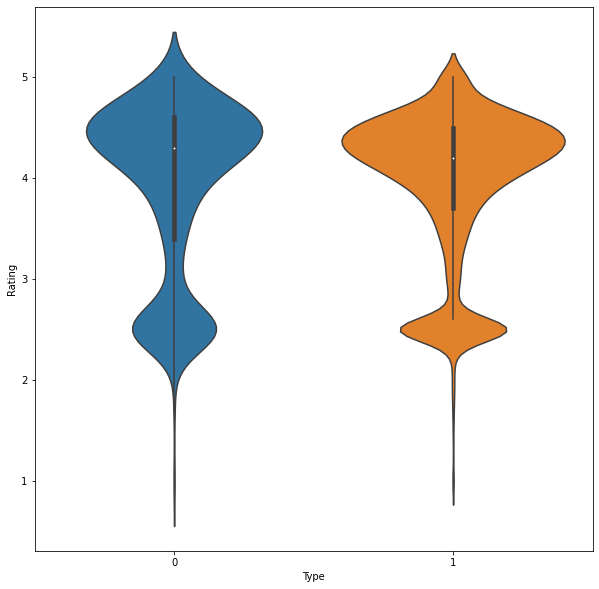

In [ ]:
sns.violinplot(x=y, y=data['Rating'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

print("Качество алгоритма до нормализации:",
      KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train).score(X_test, y_test))

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train, ), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

print("Качество алгоритма после нормализации:",
      KNeighborsClassifier(n_neighbors=2).fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

Качество алгоритма до нормализации: 0.8785977859778598
Качество алгоритма после нормализации: 0.8494464944649447


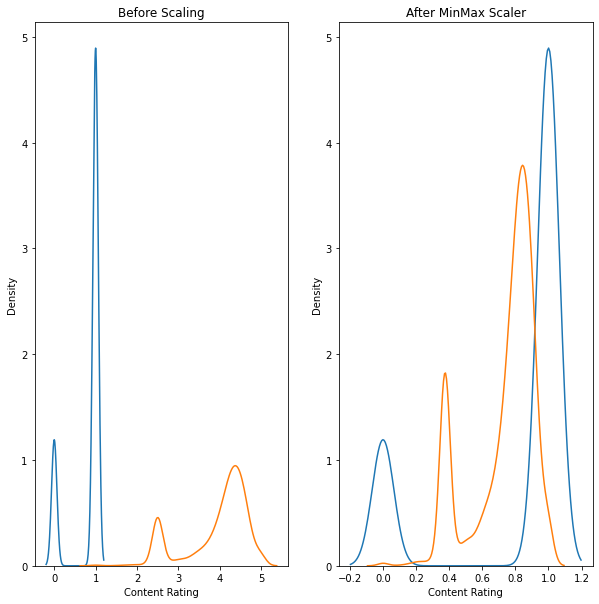

In [ ]:
# графики
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Content Rating'], ax=ax1)
sns.kdeplot(X_train['Rating'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(X_train_scaled['Content Rating'], ax=ax2)
sns.kdeplot(X_train_scaled['Rating'], ax=ax2)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]:
    print(clf.__class__.__name__, clf.fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

DecisionTreeClassifier 0.9066420664206642
SGDClassifier 0.9261992619926199
SVC 0.9261992619926199
GaussianNB 0.32250922509225094
KNeighborsClassifier 0.9202952029520295


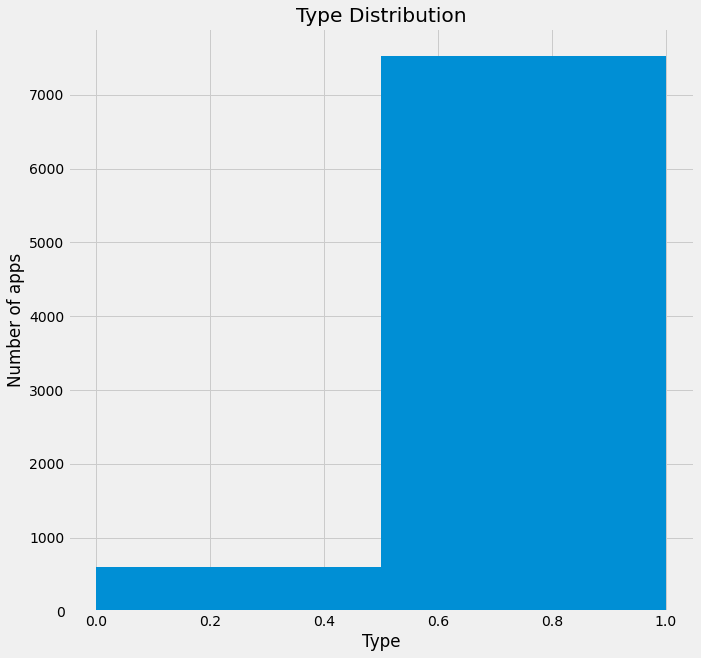

In [ ]:
plt.style.use('fivethirtyeight')
plt.hist(y_train, bins=2);
plt.xlabel('Type'); plt.ylabel('Number of apps');
plt.title('Type Distribution');

In [ ]:
from sklearn.metrics import accuracy_score

a = np.ones(y_test.shape[0])
accuracy_score(y_test, a)

0.9261992619926199

In [ ]:
X_train_scaled.reset_index(inplace=True, drop=True)
y_train.reset_index(drop=True, inplace=True)

In [ ]:
paid = X_train_scaled[y_train == 0]
X_train_strat = pd.concat([X_train_scaled, paid, paid], ignore_index=True)
y_train_strat = pd.concat([y_train, pd.Series(np.ones(X_train_strat.shape[0]-X_train_scaled.shape[0]))],
                          ignore_index=True)

In [ ]:
for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]:
    print(clf.__class__.__name__, clf.fit(X_train_strat, y_train_strat).score(X_test_scaled, y_test))

DecisionTreeClassifier 0.9261992619926199
SGDClassifier 0.9261992619926199
SVC 0.9261992619926199
GaussianNB 0.32250922509225094
KNeighborsClassifier 0.9261992619926199


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, f1_score, fbeta_score, auc

print('Accuracy:', accuracy_score(y_test, a))
print('Precision:', precision_score(y_test, a))
print('Recall:', recall_score(y_test, a))
print('ROC AUC:', roc_auc_score(y_test, a))
pr, rec, _ = precision_recall_curve(y_test, a)
print('PRC AUC:', auc(rec, pr))
print('F1:', f1_score(y_test, a))


Accuracy: 0.9261992619926199
Precision: 0.9261992619926199
Recall: 1.0
ROC AUC: 0.5
PRC AUC: 0.96309963099631
F1: 0.9616858237547892
